This is about how to use the tensorflow dataset. 
This Datasets is a collection of datasets ready to use with TensorFlow

In [1]:
# Install: pip install tensorflow-datasets
import tensorflow_datasets as tfds
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

tf.enable_eager_execution()

In [2]:
#sample of dataset available in tensorflow
tfds.list_builders()

['abstract_reasoning',
 'bair_robot_pushing_small',
 'caltech101',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'cnn_dailymail',
 'coco2014',
 'colorectal_histology',
 'colorectal_histology_large',
 'cycle_gan',
 'diabetic_retinopathy_detection',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'fashion_mnist',
 'flores',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imdb_reviews',
 'iris',
 'kmnist',
 'lm1b',
 'lsun',
 'mnist',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',
 'open_images_v4',
 'oxford_flowers102',
 'oxford_iiit_pet',
 'para_crawl',
 'quickdraw_bitmap',
 'rock_paper_scissors',
 'shapes3d',
 'smallnorb',
 'squad',
 'starcraft_video',
 'sun397',
 'svhn_cropped',
 'ted_hrlr_translate',
 'ted_multi_translate',
 'tf_flowers',
 'titanic',
 'ucf101',
 'voc2007',
 'wikipedia',
 'wmt15_translate',
 'wmt1

In [3]:
#how to use the dataset
mnist_data = tfds.load("mnist")
mnist_train, mnist_test = mnist_data["train"], mnist_data["test"]
assert isinstance(mnist_train, tf.data.Dataset)

In [4]:
mnist = tfds.load("mnist:1.*.*")

Label: 7


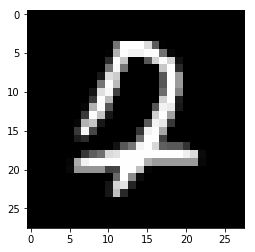

In [5]:
mnist_example, = mnist_train.take(1)
image, label = mnist_example["image"], mnist_example["label"]

plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
print("Label: %d" % label.numpy())

In [6]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split=tfds.Split.TRAIN)
mnist_train

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [7]:
mnist_train = mnist_train.repeat().shuffle(1024).batch(32)
mnist_train = mnist_train.prefetch(tf.data.experimental.AUTOTUNE)

In [8]:
info = mnist_builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)
    },
    total_num_examples=70000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=10000>,
        'train': <tfds.core.SplitInfo num_examples=60000>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @article{lecun2010mnist,
          title={MNIST handwritten digit database},
          author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
          journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
          volume={2},
          year={2010}
        }
        
    """',
    redistribution_info=,
)



In [9]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({'image': Image(shape=(28, 28, 1), dtype=tf.uint8), 'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)})
10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [10]:
dataset, info = tfds.load("mnist", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10)
    },
    total_num_examples=70000,
    splits={
        'test': <tfds.core.SplitInfo num_examples=10000>,
        'train': <tfds.core.SplitInfo num_examples=60000>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @article{lecun2010mnist,
          title={MNIST handwritten digit database},
          author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
          journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
          volume={2},
          year={2010}
        }
        
    """',
    redistribution_info=,
)

